# 5a Data Pre-Processing Functions

There is a saying in data analysis, and computer science more broadly: ‘garbage in, garbage out’. Even with the most sophisticated and elegantly designed machine learning algorithm in the world, if the data put into it is messy and bad, nothing useful will come from the model generated. A model is only as good as the data it is trained with.
<br>
<br>Classification algorithms look for subtle differences between samples in order to distinguish different groups of data. But if differences between samples are due to external factors, rather than genuine sample differences, such algorithms will be misdirected.
<br>
<br>A machine learning algorithm does not know to ignore small differences/anomalies – how can it? At best, these will confuse the algorithm. At worst, they will be interpreted as important features to learn from. It is therefore important that we eliminate experimental variation in data as much as possible so that only genuine differences are represented.
<br>
<br>Consider the two overlayed spectra below:
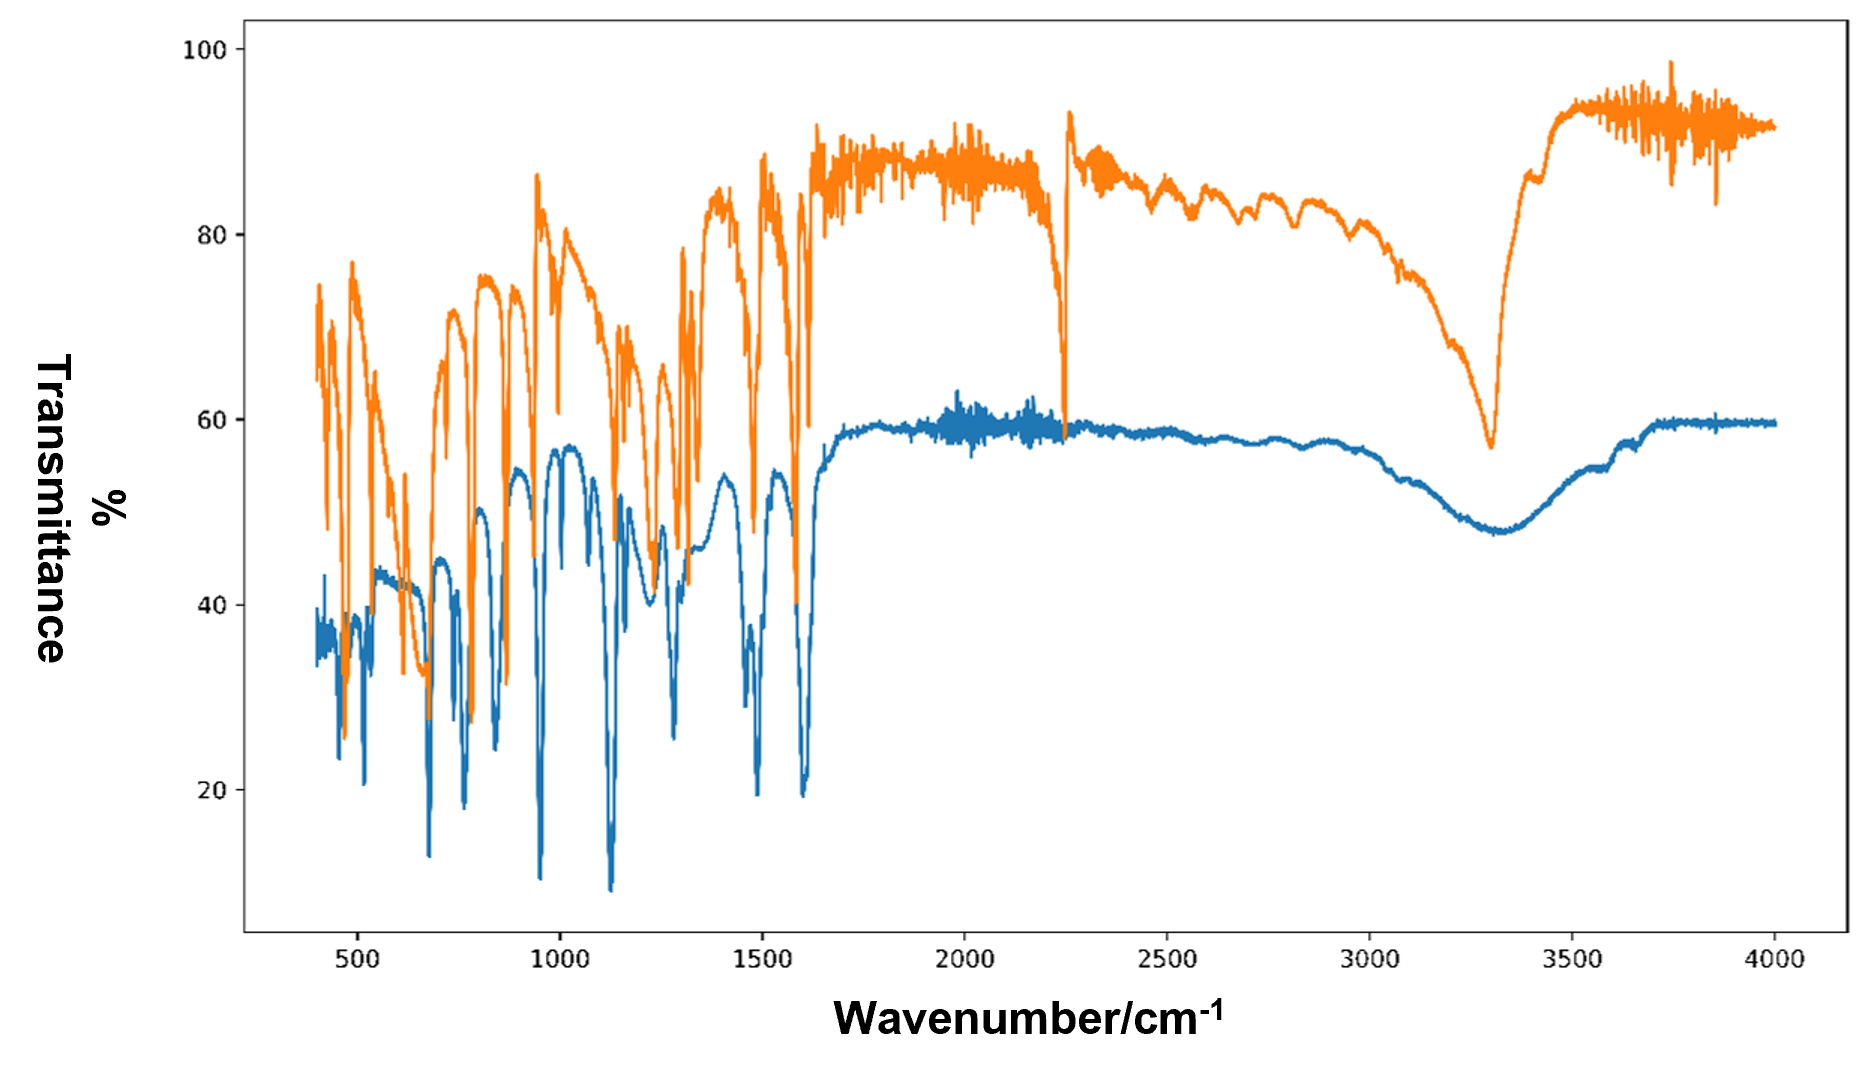
<br>
<br>You can easily attribute the fuzzy areas between 1500 - 2200 and 3500 - 4000 wavenumbers as noise (possibly due to a poor background), but an algorithm cannot. This can potentially be removed by smoothing the data.
<br>
<br>Similarly there are lare variations in transmittance, with even the baselines being different. This is likely caused by different amounts of sample being used for acquisition of the spectra and can also be corrected, *via* normalisation, before passing to the algorithm.

In this notebook, you will write some functions to carry out some pre-processing of the DataFrame of an IR spectrum. you will write functions to:

1. Interpolate (replace decimal wavenumber rows (`400.482642`) with integer wavenumbers (`400`)).
2. Normalise (set the area under all spectra to 1).
3. Narrow the wavenumber range of the spectra.

You will test out our functions on an example DataFrame - `m-anisaldehyde_1.txt`, since you are familiar with it from Notebook 4.

✏️ Each time we start a new file, we need to import all our libraries again. Import the numpy and pandas libraries.

In [1]:
import numpy as np
import pandas as pd

✏️ Load `m-anisaldehyde_1.txt` into a DataFrame again, and print the first five lines to check this has worked.
<br>
<br>This time, use the `index_col` argument when making your DataFrame object to set the initial (*Hint: zeroth*) column of the *.txt* file (the wavenumbers) as the index. You'll only need to specify one column title.
<br>
<br> The resultant DataFrame should look like:
>|        | % Transmittance |
>| ----------- | ----------- |
>| 399.826377      | 92.012424       |
>| 400.183684   | 94.958885        |

In [76]:
m_anisaldehyde_1=pd.read_csv('data/m-anisaldehyde_1.txt',skiprows=4,delimiter="\s+",names=["% Transmittance"],index_col=0)
m_anisaldehyde_1.head()

,% Transmittance
399.826377,92.012424
400.183684,94.958885
400.540991,97.443201
400.898298,97.642822
401.255605,95.774480


## 1. Interpolation

✏️ The index column of a DataFrame is an attribute that can be accesssed via `.index`. Use the `list()` function to save the index column of the `m_anisaldehyde_1` DataFrame as a list called `index_list`.

In [72]:
index_list=list(m_anisaldehyde_1.index)

The indices (wavenumbers) recorded in the DataFrame are specified to a high degree of precision on export from the Shimadzu IR software. The exact wavenumbers may not be consistent across files, and are also cumbersome to handle due the need to type large strings of numbers to specify particular DataFrame rows.
<br>
<br>In the following steps, we will interpolate the experimental data to evaluate the expected values at whole number wavenumbers. This will make the data easier to handle and comparable across spectra once all acquired data has been transformed in the same way.
<br>
<br>An outline of the process is as follows:
1. Create a DataFrame of empty entries in which the index for each row is an integer between the maximum and minimum recorded wavenumbers in the IR data.
2. Join this DataFrame onto the IR DataFrame and sort the data by index to position each empty entry at its ordered position within the spectral data.
3. Interpolate a value at each empty entry by taking the weighted value of the two neighbouring data points.
4. Remove any rows containing non-integer indices to leave the interpolated results.

✏️ Using Python's `min()` and `max()` functions, find the smallest and largest values in the index_list extracted from the `m_anisaldehyde_1` DataFrame. Round these values to the nearest integer using the `round()` function and store them as two new variables, `minimum_index` and `maximum_index`.

In [24]:
Min,Max = min(index_list),max(index_list)
minimum_index, maximum_index = round(Min,0),round(Max,0)
print(minimum_index,maximum_index)

400.0 4000.0


✏️ Create two lists:
1. All the integers between `minimum_index` and `maximum_index`.
2. A list, exactly the same length as the previous list, of a special data type called `NaN` ('**N**ot **A** **N**umber'). This is accessed with `np.nan`. It should look like `[NaN, NaN, ..., NaN]`, and be just as long as the previous list. *Hint: You might like to use a for loop.*

In [31]:
ints=list(range(400,4001))
NaNlist=[np.NaN for i in ints]

✏️ Now, using your two lists, create a DataFrame like the one below, with the integers between `minimum_index` and `maximum_index` as its index, and a column (called "% Transmittance"), filled with `NaN` values.

>|        | % Transmittance |
>| ----------- | ----------- |
>| 400      | NaN       |
>| 401   | NaN        |
>| ...   | ...        |
>| 4000   | NaN        |

Make sure your integers are used as the index, and that your column has the same title as the frame above. The data should be your NaN list.

In [33]:
df=pd.DataFrame(data=NaNlist,columns=['% Transmittance'],index=ints)

✏️ Alter your from code above, so that instead of explicitly writing out "% Transmittance" for the column name, you use the `columns` attribute of your `m_anisaldehyde_1` DataFrame to find the name of the first (and, in this case, *only*) column. This is so that your code will work no matter what the column is titled.

*Hint: Recall that the `.columns` attribute returns a list of all the column titles of a DataFrame*

In [35]:
df=pd.DataFrame(data=NaNlist,columns=[m_anisaldehyde_1.columns[0]],index=ints)
df.head()

,% Transmittance
400,NaN
401,NaN
402,NaN
403,NaN
404,NaN


✏️ Use the documentation linked to below to confirm the syntax required to join two `pandas` DataFrames using the `concat()` function with the same column headers. Use this to join your empty DataFrame onto the bottom of your `m_anisaldehyde_1` DataFrame.

https://pandas.pydata.org/docs/reference/api/pandas.concat.html

*Hint: Make sure you make this concatenation permanent.*

Check the tail (similar to `.head()`) of the new DataFrame to check that the integer indices have been added.

In [41]:
merged=pd.concat([m_anisaldehyde_1,df])
merged.head()
merged.tail()

,% Transmittance
3996.0,NaN
3997.0,NaN
3998.0,NaN
3999.0,NaN
4000.0,NaN


✏️ Use the `.sort_index()` method to rearrange the rows of the DataFrame by their indices. Check the head and tail of the new DataFrame to make sure this process has been carried out correctly.

In [47]:
merged=merged.sort_index()
merged.head()
merged.tail()

,% Transmittance
3999.000000,NaN
3999.335695,99.706163
3999.693002,99.483278
4000.000000,NaN
4000.050309,99.437475


We now want to replace the `NaN` values by interpolation from the two neighbouring values.

DataFrames have an `interpolate()` method which returns a new DataFrame with any `NaN` values replaced with a value interpolated from the values either side of it.

![Depiction of linear interpolation](https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/LinearInterpolation.svg/450px-LinearInterpolation.svg.png)

✏️ Fill in the `NaN` values using interpolation.

In [49]:
df2=merged.interpolate()
df2.head()
df2.tail()

,% Transmittance
3999.000000,99.595892
3999.335695,99.706163
3999.693002,99.483278
4000.000000,99.460376
4000.050309,99.437475


Finally, we want to remove any rows with non-integer indices.

✏️ Using the `loc[]` method previously introduced for DataFrames. Create a new version of the DataFrame in which only indices with integer values remain.
*Hint: You may already have constructed a list which could be of use here.*

In [51]:
new_data=[df2.loc[int] for int in ints]
df3=pd.DataFrame(data=new_data,columns=['% Transmittance'],index=ints)
df3.head()
df3.tail()

,% Transmittance
3996,99.850405
3997,99.322068
3998,99.536503
3999,99.595892
4000,99.460376


✏️ Referring back to the introduction of functions in Notebook 3, pull all of these processes together into a single function which takes in a DataFrame with decimal indices, and returns it interpolated, with integer indices.

*Hint: Remember to write your code so that it will work no matter what the column is called*

In [111]:
def Interpolate(dataframe):
    index_list=list(dataframe.index)
    Min,Max = min(index_list),max(index_list)
    minimum_index, maximum_index = round(Min,0),round(Max,0)
    ints=list(range(400,4001))
    NaNlist=[np.NaN for i in ints]
    df=pd.DataFrame(data=NaNlist,columns=[dataframe.columns[0]],index=ints)
    merged=pd.concat([dataframe,df])
    merged=merged.sort_index()
    df2=merged.interpolate()
    new_data=[df2.loc[int] for int in ints]
    df3=pd.DataFrame(data=new_data,columns=[dataframe.columns[0]],index=ints)
    return df3

✏️ Load in `m_anisaldehyde_1` again (using `read_csv()`), and interpolate it with your new function to check that it is giving the same result to the processes carried out above.

In [112]:
m_anisaldehyde_1=pd.read_csv('data/m-anisaldehyde_1.txt',skiprows=4,delimiter="\s+",names=["% Transmittance"],index_col=0)
df4=Interpolate(m_anisaldehyde_1)
df4.head()

,% Transmittance
400,93.485654
401,96.708651
402,97.294286
403,93.727395
404,92.881254


## 2. Normalisation

The next function we need is one which normalises our DataFrame. By normalise, we mean set the area under the spectrum to have an integral of 1.

You should have written a function in Notebook 3 which takes in a list of x values, a list of y values, and returns the area under the curve they define.

✏️ Find the area under the 'curve' that is the IR spectrum of m-anisaldehyde. You should get ~327544.

*Hint: Recall the `index` attribute of your DataFrame. The `values` attribute of a DataFrame column/series gives that column/series as a list.*

In [79]:
def numerical_integral(x_values,y_values):
    summation=0
    for i in range(1,len(x_values)):
        summation+=0.5*(y_values[i]+y_values[i-1])*(x_values[i]-x_values[i-1])
    return summation

x_values=df4.index
y_values=df4.values

print(numerical_integral(df4.index,df4.values))

[327544.5885085]


✏️ Normalise the transmittance column of your `m_anisaldehyde_1` DataFrame.

**Note:**
>Recall from Exercise 4 what happens when you perform a mathematical operation on a DataFrame column (e.g. `dataframe["column"]*10`).
>
>Once normalised, you could put your normalised DataFrame through your `area_under_curve` function to check you've done it right (the area should be 1).

In [157]:
df4[df4.columns[0]]=df4[df4.columns[0]]/numerical_integral(df4.index,df4.values)
df4.loc[630]

% Transmittance    0.000264
Name: 630, dtype: float64

✏️ In a similar way to before, pull this all together into a single function which takes in an unnormalised DataFrame, and returns it normalised.

*Hint: Incorporate your written out area_under_curve code into this function. As with your interpolation function, write your function so that it will work no matter what the column is called.*

In [182]:
def Normalise(dataframe):
    def numerical_integral(x_values,y_values):
        summation=0
        for i in range(1,len(x_values)):
            summation+=0.5*(y_values[i]+y_values[i-1])*(x_values[i]-x_values[i-1])
        return summation
    dataframe[dataframe.columns[0]]=dataframe[dataframe.columns[0]]/((numerical_integral(dataframe.index,dataframe.values)))
    return dataframe

✏️ Load in `m_anisaldehyde_1` again (using `read_csv()`), and normalise it with your new function.

In [183]:
m_anisaldehyde_1=pd.read_csv('data/m-anisaldehyde_1.txt',skiprows=4,delimiter="\s+",names=["% Transmittance"],index_col=0)
dataframe=Normalise(m_anisaldehyde_1)
#print(numerical_integral(dataframe.index,dataframe.values))
#dataframe.loc[630]
dataframe.head()

,% Transmittance
399.826377,0.000281
400.183684,0.000290
400.540991,0.000297
400.898298,0.000298
401.255605,0.000292


## 3. Narrowing the Wavelength Range

Recall that the ultimate goal of this exercise is to identify substitutions patterns from IR spectra. As introduced in the manual, this can chiefly, although not necessarily exclusively, be performed by considering the fingerprint region of the spectrum.
<br>
<br>The exact region which gives the best results has been optimised for this exercise and happens to be the range of $ 630 cm^{-1} - 880 cm^{-1}$.

✏️ Write a function which takes in a DataFrame with wavelengths from $ 400 cm^{-1} - 4000 cm^{-1} $, narrows the wavelength range of it to $ 630 cm^{-1} - 880 cm^{-1}$, and returns this modified DataFrame.

*Hint: You may wish to refer back to how `loc[]` method and slices work.*

In [178]:
def Narrow(dataframe):
    new_indices=list(range(630,881))
    new_data=[dataframe.iloc[int-400] for int in new_indices]
    dataframe=pd.DataFrame(data=new_data, columns=[dataframe.columns[0]],index=new_indices)
    return dataframe

✏️ Using your function, narrow the wavelength range of `m_anisaldehyde_1`.

In [180]:
Narrow(m_anisaldehyde_1)

,% Transmittance
630,92.896577
631,93.530961
632,93.415785
633,92.721563
634,93.026569
635,93.676959
636,93.604413
637,93.222991
638,93.098136
639,93.947393


## 4. Combining the Processes

✏️ Finally, load in `m_anisaldehyde_1` again (using `read_csv`), and apply each of your functions to it in turn, in the order interpolate, normalise, narrow. You should end up with a DataFrame which starts:
>|        | % Transmittance |
>| ----------- | ----------- |
>| 630      | 0.000264       |
>| 631   | 0.000265        |

In [184]:
m_anisaldehyde_1=pd.read_csv('data/m-anisaldehyde_1.txt',skiprows=4,delimiter="\s+",names=["% Transmittance"],index_col=0)
Narrow(Normalise(Interpolate(m_anisaldehyde_1))).head()

,% Transmittance
630,0.000264
631,0.000265
632,0.000262
633,0.000258
634,0.000255


---

## 5. Constructing a Library

It is not only professional programmers who can make libraries - anyone can.
<br>
<br>A library is nothing more than a Python file (`.py`), containing a collection of objects and functions. This file can be imported into other files, which can then use its functions and objects.
<br>
<br>A library is made and used in the following way:
 - Make a new .py file (create a .txt file and alter the file type suffix)
 - Import any other libraries your code needs (e.g. pandas, etc.)
 - Define one or more functions (`def`...)
 - In another file *or Jupyter Notebook* in the same folder, `import` the file
 - Use a *function* in the *library* with `library.function()`

✏️ Create a new library (`C317.py`), and add each of your three functions to it. Save it, then import it below.

In [194]:
import C317

✏️ Load in m_anisaldehyde_1 one final time, and apply each of the functions in your library to it in turn.

In [195]:
m_anisaldehyde_1=pd.read_csv('data/m-anisaldehyde_1.txt',skiprows=4,delimiter="\s+",names=["% Transmittance"],index_col=0)
C317.Narrow(C317.Normalise(C317.Interpolate(m_anisaldehyde_1)))

,% Transmittance
630,0.000264
631,0.000265
632,0.000262
633,0.000258
634,0.000255
635,0.000253
636,0.000245
637,0.000241
638,0.000233
639,0.000223


---